### Problem Statement

# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia.  
The company is looking at prospective properties to buy to enter the market.

## Requirement of the company-
We are required to build a regression model using regularisation in order to predict the actual value of the 
prospective properties and decide whether to invest in them or not.

The company wants to know:
    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.
Also, We need to determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# Set required options to fit the display to best possible way
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style("whitegrid")

In [2]:
# Loading the housing data
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA- Step 1: Understanding the data

In [3]:
#Check all columns 
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Checking the shape of dataframe
housing_data.shape

(1460, 81)

In [5]:
# description of dataframe
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking all the columns with null values
null_count = housing_data.isnull().sum()
missing_values_count = null_count[null_count > 0].sort_values(ascending=False)
percentage_by_missing_values = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
missing_values_df = pd.concat([missing_values_count,percentage_by_missing_values], axis=1, keys=['Missing_values_count', 'Missing_values_Perc'])
missing_values_df[missing_values_df['Missing_values_Perc']>0].head(50)

,Missing_values_count,Missing_values_Perc
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945


In [8]:
# Checking the columns with high values of missing values.. assuming a threshold as 50%
missing_values_50_df = missing_values_df[missing_values_df['Missing_values_Perc']>50]
missing_values_50_df

,Missing_values_count,Missing_values_Perc
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425


### Observation- If we keep a threshold as 50% then there are total 4 columns having more than 50% missing values.
- We can remove those columns from making decision as it will not enfluemce the decision.

In [9]:
#Drop columns with maximum missing values
housing_data = housing_data.drop(columns=['PoolQC', 'MiscFeature','Alley', 'Fence'])

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
# Check if there are any columns with unique values for all rows-
columns_with_unique_value_counts = housing_data.nunique().sort_values(ascending=True)
columns_with_unique_value_counts

Street           2
Utilities        2
CentralAir       2
PavedDrive       3
HalfBath         3
              ... 
1stFlrSF       753
BsmtUnfSF      780
GrLivArea      861
LotArea       1073
Id            1460
Length: 77, dtype: int64

In [12]:
#check unique values of FireplaceQu 
housing_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
#check Missing values of columns
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [14]:
#replace Nan values of FireplaceQu with NA
housing_data.FireplaceQu = housing_data.FireplaceQu.fillna('NA')

In [15]:
#check missing values again
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#check unique values of LotFrontage
housing_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
#check median of LotFrontage
LotFrontage_median = housing_data.LotFrontage.median()
LotFrontage_median

69.0

In [18]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
housing_data.LotFrontage = housing_data.LotFrontage.fillna(LotFrontage_median)

In [19]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing_data.MasVnrArea = housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.median())    

In [20]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
housing_data.MasVnrType = housing_data.MasVnrType.fillna('None')

In [21]:
#replace Nan values of BsmtQual with NA i.e. No Basement
housing_data.BsmtQual = housing_data.BsmtQual.fillna('NA')

In [22]:
#replace Nan values of BsmtCond with NA i.e. No Basement
housing_data.BsmtCond = housing_data.BsmtCond.fillna('NA')

In [23]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
housing_data.BsmtExposure = housing_data.BsmtExposure.fillna('No')

In [24]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
housing_data.BsmtFinType1 = housing_data.BsmtFinType1.fillna('NA')

In [25]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
housing_data.BsmtFinType2 = housing_data.BsmtFinType2.fillna('NA')

In [26]:
#impute missing values of Electrical with mode due to categorical column
housing_data.Electrical = housing_data.Electrical.fillna(housing_data.Electrical.mode()[0])    

In [27]:
#replace Nan values of GarageType with NA i.e. No Garage
housing_data.GarageType = housing_data.GarageType.fillna('NA')

In [28]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
housing_data.GarageYrBlt = housing_data.GarageYrBlt.fillna(0)

In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
housing_data.GarageFinish = housing_data.GarageFinish.fillna('NA')

In [30]:
#replace Nan values of GarageQual with NA i.e. No Garage
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [31]:
#replace Nan values of GarageFinish with NA i.e. No Garage
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [32]:
#replace Nan values of GarageCond with NA i.e. No Garage
housing_data.GarageCond = housing_data.GarageCond.fillna('NA')

In [33]:
#check missing values again
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

Series([], dtype: int64)

In [34]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
housing_data['HouseAge'] = housing_data.YrSold - housing_data.YearBuilt

In [35]:
#Drop YrSold, YearBuilt after HouseAge
housing_data=housing_data.drop(columns=['YrSold', 'YearBuilt'])

In [36]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
housing_data = housing_data.astype(convert_dict)

In [37]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [38]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
housing_data = housing_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [40]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
housing_data = housing_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [41]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [42]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
housing_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [45]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [46]:
for c in housing_data.columns:
    if housing_data[c].dtype == np.object :
        print(c)
        print(housing_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [47]:
#Drop columns which have moe than 80% bias data
house_data=housing_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [48]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [49]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [50]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
    #create dummy variable for weathersit
    MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
    MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [52]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
    #create dummy variable for LotShape
    LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [54]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [56]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [57]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [61]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [62]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [63]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
    #create dummy variable for Exterior2nd
    Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
    #concat Exterior2nd_df with main house_data df
    house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
    house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [65]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [68]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [76]:
    #create dummy variable for GarageType
    GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
    #concat GarageType_df with main house_data df
    house_data = pd.concat([house_data,GarageType_df],axis=1)
    house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [77]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [80]:
house_data.shape

(1460, 162)

In [81]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [82]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


### Prepairing Data For Modeling

In [84]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [85]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [86]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [87]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

### Training The Model

In [88]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [89]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

    ### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [90]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=35)
rfe = rfe.fit(X_train,y_train)

In [91]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 4),
 ('LotArea', False, 4),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 4),
 ('BsmtQual', False, 2),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 4),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 4),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 4),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', False, 4),
 ('KitchenQual', False, 4),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 3),
 ('FireplaceQu', False, 3),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 4),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 4),


In [92]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_I

In [93]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_85',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU

### Building model using statsmodel, for the detailed statistics

In [94]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [95]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [96]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [97]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:23   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4291.7617   1006.830      4.263      0.000    2315.899    6267.624
BsmtFinSF2              -3.2098   1059.355     -0.003      0.998   -2082.152    2075.732
BsmtUnfSF            -2644.1890   1033.917     -2.557      0.011   -4673.208    -615.170
TotalBsmtSF           1762.2895   1617.413      1.090      0.276   -1411.817    4936.396
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103    

In [98]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
74,GarageFinish_NA,inf
43,Exterior1st_AsphShn,inf
73,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
...,...,...
42,RoofStyle_Shed,1.09
39,RoofStyle_Gambrel,1.09
24,LotConfig_FR2,1.08
72,Foundation_Wood,1.02


___GarageType_NA has higher p-value. Lets drop it.___

In [99]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [100]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exte

___Rebuild the model without GarageType_NA___

In [101]:
X_train_lm = sm.add_constant(X_train_new)

In [102]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [103]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:23   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4291.7617   1006.830      4.263      0.000    2315.899    6267.624
BsmtFinSF2              -3.2098   1059.355     -0.003      0.998   -2082.152    2075.732
BsmtUnfSF            -2644.1890   1033.917     -2.557      0.011   -4673.208    -615.170
TotalBsmtSF           1762.2895   1617.413      1.090      0.276   -1411.817    4936.396
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103    

___Exterior1st_CBlock has higher p-value. Lets drop it.___

In [104]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

    ___Rebuild the model without Exterior1st_CBlock___

In [105]:
X_train_lm = sm.add_constant(X_train_new)

In [106]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [107]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4291.7617   1006.830      4.263      0.000    2315.899    6267.624
BsmtFinSF2              -3.2098   1059.355     -0.003      0.998   -2082.152    2075.732
BsmtUnfSF            -2644.1890   1033.917     -2.557      0.011   -4673.208    -615.170
TotalBsmtSF           1762.2895   1617.413      1.090      0.276   -1411.817    4936.396
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [108]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

___Rebuild the model without Exterior2nd_CBlock___

In [109]:
X_train_lm = sm.add_constant(X_train_new)

In [110]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [111]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.58
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.449e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.178      0.000    4.12e+04    1.14e+05
OverallQual           2.225e+04   1898.647     11.720      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.966      9.382      0.000    9460.229    1.45e+04
BsmtFinSF1            4289.0690   1005.955      4.264      0.000    2314.926    6263.212
BsmtFinSF2              -5.5520   1058.552     -0.005      0.996   -2082.914    2071.811
BsmtUnfSF            -2646.4301   1033.142     -2.562      0.011   -4673.927    -618.933
TotalBsmtSF           1756.4994   1615.560      1.087      0.277   -1413.966    4926.965
1stFlrSF              6394.9311   1997.132      3.202      0.001    2475.646    1.03e+04
2ndFlrSF              1.818e+04   2039.642      8.911      0.000    1.42e+04    2.22e+04
LowQualFinSF          -876.9185   1201.291     -0.730      0.466   -3234.399    1480.562
GrLivArea             1.959e+04   1217.085     16.094      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.257e+05   3.03e+04      4.143      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.612e+04   2.53e+04     -0.637      0.524   -6.58e+04    3.36e+04
MSSubClass_75         8708.6836   2.03e+04      0.430      0.668   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5978.660     -4.191      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.736e+04   5074.157     -5.391      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.566e+04   6580.385     -3.900      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.884e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.704e+04   7212.593     -2.363      0.018   -3.12e+04   -2889.795
MSZoning_FV           2.289e+04   1.67e+04      1.373      0.170   -9823.401    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.816      0.070   -2302.802    5.96e+04
MSZoning_RL           3.415e+04   1.31e+04      2.607      0.009    8438.605    5.99e+04
MSZoning_RM           2.879e+04   1.32e+04      2.176      0.030    2829.177    5.48e+04
LotConfig_CulDSac     1.124e+04   4356.511      2.580      0.010    2688.262    1.98e+04
LotConfig_FR2        -1.155e+04   6114.105     -1.890      0.059   -2.36e+04     445.789
Neighborhood_ClearCr  1.554e+04   7951.674      1.954      0.051     -67.402    3.11e+04
Neighborhood_Crawfor  3.468e+04   6313.981      5.492      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.406e+04   4317.537     -3.256      0.001   -2.25e+04   -5586.660
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.821      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6501.736      8.848      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5453.054     11.689      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9363.891      4.105    

___GrLivAreaFin has higher p-value. Lets drop it.___

In [112]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

___Rebuild the model without GrLivArea___

In [113]:
X_train_lm = sm.add_constant(X_train_new)

In [114]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [115]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.58
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.449e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.178      0.000    4.12e+04    1.14e+05
OverallQual           2.225e+04   1898.647     11.720      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.966      9.382      0.000    9460.229    1.45e+04
BsmtFinSF1            4289.0690   1005.955      4.264      0.000    2314.926    6263.212
BsmtFinSF2              -5.5520   1058.552     -0.005      0.996   -2082.914    2071.811
BsmtUnfSF            -2646.4301   1033.142     -2.562      0.011   -4673.927    -618.933
TotalBsmtSF           1756.4994   1615.560      1.087      0.277   -1413.966    4926.965
1stFlrSF              2.105e+04   2389.793      8.808      0.000    1.64e+04    2.57e+04
2ndFlrSF              3.421e+04   2684.756     12.744      0.000    2.89e+04    3.95e+04
LowQualFinSF           898.5494   1212.356      0.741      0.459   -1480.647    3277.746
GarageYrBlt           1.257e+05   3.03e+04      4.143      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.612e+04   2.53e+04     -0.637      0.524   -6.58e+04    3.36e+04
MSSubClass_75         8708.6836   2.03e+04      0.430      0.668   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5978.660     -4.191      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.736e+04   5074.157     -5.391      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.566e+04   6580.385     -3.900      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.884e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.704e+04   7212.593     -2.363      0.018   -3.12e+04   -2889.795
MSZoning_FV           2.289e+04   1.67e+04      1.373      0.170   -9823.401    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.816      0.070   -2302.802    5.96e+04
MSZoning_RL           3.415e+04   1.31e+04      2.607      0.009    8438.605    5.99e+04
MSZoning_RM           2.879e+04   1.32e+04      2.176      0.030    2829.177    5.48e+04
LotConfig_CulDSac     1.124e+04   4356.511      2.580      0.010    2688.262    1.98e+04
LotConfig_FR2        -1.155e+04   6114.105     -1.890      0.059   -2.36e+04     445.789
Neighborhood_ClearCr  1.554e+04   7951.674      1.954      0.051     -67.402    3.11e+04
Neighborhood_Crawfor  3.468e+04   6313.981      5.492      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.406e+04   4317.537     -3.256      0.001   -2.25e+04   -5586.660
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.821      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6501.736      8.848      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5453.054     11.689      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9363.891      4.105      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.133e+04   9959.994      4.150    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [116]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [117]:
X_train_lm = sm.add_constant(X_train_new)

In [118]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [119]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.58
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.449e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.178      0.000    4.12e+04    1.14e+05
OverallQual           2.225e+04   1898.647     11.720      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.966      9.382      0.000    9460.229    1.45e+04
BsmtFinSF1            4289.0690   1005.955      4.264      0.000    2314.926    6263.212
BsmtFinSF2              -5.5520   1058.552     -0.005      0.996   -2082.914    2071.811
BsmtUnfSF            -2646.4301   1033.142     -2.562      0.011   -4673.927    -618.933
TotalBsmtSF           1756.4994   1615.560      1.087      0.277   -1413.966    4926.965
1stFlrSF              2.105e+04   2389.793      8.808      0.000    1.64e+04    2.57e+04
2ndFlrSF              3.421e+04   2684.756     12.744      0.000    2.89e+04    3.95e+04
LowQualFinSF           898.5494   1212.356      0.741      0.459   -1480.647    3277.746
GarageYrBlt           1.257e+05   3.03e+04      4.143      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.612e+04   2.53e+04     -0.637      0.524   -6.58e+04    3.36e+04
MSSubClass_75         8708.6836   2.03e+04      0.430      0.668   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5978.660     -4.191      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.736e+04   5074.157     -5.391      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.566e+04   6580.385     -3.900      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.884e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.704e+04   7212.593     -2.363      0.018   -3.12e+04   -2889.795
MSZoning_FV           2.289e+04   1.67e+04      1.373      0.170   -9823.401    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.816      0.070   -2302.802    5.96e+04
MSZoning_RL           3.415e+04   1.31e+04      2.607      0.009    8438.605    5.99e+04
MSZoning_RM           2.879e+04   1.32e+04      2.176      0.030    2829.177    5.48e+04
LotConfig_CulDSac     1.124e+04   4356.511      2.580      0.010    2688.262    1.98e+04
LotConfig_FR2        -1.155e+04   6114.105     -1.890      0.059   -2.36e+04     445.789
Neighborhood_ClearCr  1.554e+04   7951.674      1.954      0.051     -67.402    3.11e+04
Neighborhood_Crawfor  3.468e+04   6313.981      5.492      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.406e+04   4317.537     -3.256      0.001   -2.25e+04   -5586.660
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.821      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6501.736      8.848      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5453.054     11.689      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9363.891      4.105      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.133e+04   9959.994      4.150    

In [120]:
X_train_new.shape

(1021, 70)

In [121]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,TotalBsmtSF,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
10,GarageYrBlt,905.28
...,...,...
41,RoofStyle_Shed,1.09
38,RoofStyle_Gambrel,1.09
23,LotConfig_FR2,1.08
68,Foundation_Wood,1.02


    ___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [122]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [123]:
X_train_lm = sm.add_constant(X_train_new)

In [124]:
    #Running the Linear Model
    lm = sm.OLS(y_train,X_train_lm).fit()

In [125]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.58
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:25   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.449e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.178      0.000    4.12e+04    1.14e+05
OverallQual           2.225e+04   1898.647     11.720      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.966      9.382      0.000    9460.229    1.45e+04
BsmtFinSF1            4304.1838   3065.065      1.404      0.161   -1710.873    1.03e+04
BsmtUnfSF            -2631.8475   2931.723     -0.898      0.370   -8385.226    3121.531
TotalBsmtSF           1741.5802   3614.854      0.482      0.630   -5352.414    8835.574
1stFlrSF              2.105e+04   2389.793      8.808      0.000    1.64e+04    2.57e+04
2ndFlrSF              3.421e+04   2684.756     12.744      0.000    2.89e+04    3.95e+04
LowQualFinSF           898.5494   1212.356      0.741      0.459   -1480.647    3277.746
GarageYrBlt           1.257e+05   3.03e+04      4.143      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.612e+04   2.53e+04     -0.637      0.524   -6.58e+04    3.36e+04
MSSubClass_75         8708.6836   2.03e+04      0.430      0.668   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5978.660     -4.191      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.736e+04   5074.157     -5.391      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.566e+04   6580.385     -3.900      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.884e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.704e+04   7212.593     -2.363      0.018   -3.12e+04   -2889.795
MSZoning_FV           2.289e+04   1.67e+04      1.373      0.170   -9823.401    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.816      0.070   -2302.802    5.96e+04
MSZoning_RL           3.415e+04   1.31e+04      2.607      0.009    8438.605    5.99e+04
MSZoning_RM           2.879e+04   1.32e+04      2.176      0.030    2829.177    5.48e+04
LotConfig_CulDSac     1.124e+04   4356.511      2.580      0.010    2688.262    1.98e+04
LotConfig_FR2        -1.155e+04   6114.105     -1.890      0.059   -2.36e+04     445.789
Neighborhood_ClearCr  1.554e+04   7951.674      1.954      0.051     -67.402    3.11e+04
Neighborhood_Crawfor  3.468e+04   6313.981      5.492      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.406e+04   4317.537     -3.256      0.001   -2.25e+04   -5586.660
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.821      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6501.736      8.848      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5453.054     11.689      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9363.891      4.105      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.133e+04   9959.994      4.150      0.000    2.18e+04    6.09e+04
Neighborhood_Veenker  3.275e+04   1.06e+04      3.088    

___BsmtFinSF1 has higher p-value and VIF. Lets drop it.___

In [126]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

___Rebuild the model without BsmtFinSF1___

In [127]:
X_train_lm = sm.add_constant(X_train_new)

In [128]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [129]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     78.64
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:25   Log-Likelihood:                -12013.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     954   BIC:                         2.449e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.694e+04   1.86e+04      4.135      0.000    4.04e+04    1.13e+05
OverallQual           2.228e+04   1899.479     11.731      0.000    1.86e+04     2.6e+04
BsmtExposure          1.191e+04   1275.000      9.339      0.000    9404.535    1.44e+04
BsmtUnfSF            -6359.5634   1244.956     -5.108      0.000   -8802.732   -3916.395
TotalBsmtSF           5510.9015   2422.459      2.275      0.023     756.938    1.03e+04
1stFlrSF               2.11e+04   2390.735      8.826      0.000    1.64e+04    2.58e+04
2ndFlrSF              3.406e+04   2683.835     12.690      0.000    2.88e+04    3.93e+04
LowQualFinSF           816.0544   1211.549      0.674      0.501   -1561.555    3193.663
GarageYrBlt           1.277e+05   3.03e+04      4.215      0.000    6.83e+04    1.87e+05
MSSubClass_45        -1.641e+04   2.53e+04     -0.648      0.517   -6.61e+04    3.33e+04
MSSubClass_75         8923.3790   2.03e+04      0.440      0.660   -3.09e+04    4.87e+04
MSSubClass_90        -2.488e+04   5980.392     -4.161      0.000   -3.66e+04   -1.31e+04
MSSubClass_120       -2.738e+04   5076.721     -5.393      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.605e+04   6577.857     -3.961      0.000    -3.9e+04   -1.31e+04
MSSubClass_180       -2.029e+04   1.49e+04     -1.361      0.174   -4.96e+04    8973.870
MSSubClass_190       -1.652e+04   7206.460     -2.292      0.022   -3.07e+04   -2374.012
MSZoning_FV           2.261e+04   1.67e+04      1.355      0.176   -1.01e+04    5.53e+04
MSZoning_RH            2.82e+04   1.58e+04      1.788      0.074   -2755.489    5.92e+04
MSZoning_RL           3.349e+04   1.31e+04      2.556      0.011    7779.424    5.92e+04
MSZoning_RM           2.824e+04   1.32e+04      2.134      0.033    2273.821    5.42e+04
LotConfig_CulDSac     1.125e+04   4358.723      2.581      0.010    2694.801    1.98e+04
LotConfig_FR2        -1.164e+04   6116.896     -1.903      0.057   -2.36e+04     363.005
Neighborhood_ClearCr  1.484e+04   7940.035      1.869      0.062    -745.457    3.04e+04
Neighborhood_Crawfor  3.501e+04   6312.839      5.545      0.000    2.26e+04    4.74e+04
Neighborhood_Edwards -1.373e+04   4313.232     -3.183      0.002   -2.22e+04   -5262.534
Neighborhood_NPkVill  1.711e+04   1.99e+04      0.861      0.390   -2.19e+04    5.61e+04
Neighborhood_NoRidge  5.821e+04   6486.745      8.974      0.000    4.55e+04    7.09e+04
Neighborhood_NridgHt  6.385e+04   5455.328     11.703      0.000    5.31e+04    7.46e+04
Neighborhood_Somerst  3.823e+04   9367.547      4.082      0.000    1.99e+04    5.66e+04
Neighborhood_StoneBr  4.099e+04   9962.038      4.115      0.000    2.14e+04    6.05e+04
Neighborhood_Veenker  3.223e+04   1.06e+04      3.040      0.002    1.14e+04     5.3e+04
HouseStyle_1.5Unf     2.963e+04   2.36e+04      1.257    

___Exterior1st_CemntBd has higher VIF. Lets drop it.___

In [130]:
    X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

___Rebuild the model without Exterior1st_CemntBd___

In [131]:
    X_train_lm = sm.add_constant(X_train_new)

In [132]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [133]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     79.57
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:25   Log-Likelihood:                -12015.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     955   BIC:                         2.449e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.683e+04   1.86e+04      4.123      0.000    4.03e+04    1.13e+05
OverallQual           2.248e+04   1899.354     11.836      0.000    1.88e+04    2.62e+04
BsmtExposure          1.209e+04   1273.290      9.493      0.000    9588.648    1.46e+04
BsmtUnfSF            -6103.2919   1239.494     -4.924      0.000   -8535.738   -3670.846
TotalBsmtSF           5426.0818   2425.446      2.237      0.026     666.262    1.02e+04
1stFlrSF              2.096e+04   2392.940      8.758      0.000    1.63e+04    2.57e+04
2ndFlrSF              3.398e+04   2687.285     12.645      0.000    2.87e+04    3.93e+04
LowQualFinSF           805.8069   1213.234      0.664      0.507   -1575.105    3186.719
GarageYrBlt           1.256e+05   3.03e+04      4.142      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.634e+04   2.54e+04     -0.644      0.520   -6.61e+04    3.34e+04
MSSubClass_75         8318.2364   2.03e+04      0.410      0.682   -3.15e+04    4.82e+04
MSSubClass_90        -2.482e+04   5988.684     -4.145      0.000   -3.66e+04   -1.31e+04
MSSubClass_120       -2.742e+04   5083.790     -5.393      0.000   -3.74e+04   -1.74e+04
MSSubClass_160       -2.597e+04   6586.912     -3.942      0.000   -3.89e+04    -1.3e+04
MSSubClass_180       -2.152e+04   1.49e+04     -1.442      0.150   -5.08e+04    7760.314
MSSubClass_190       -1.638e+04   7216.192     -2.270      0.023   -3.05e+04   -2217.147
MSZoning_FV           2.278e+04   1.67e+04      1.364      0.173   -9993.069    5.56e+04
MSZoning_RH            2.82e+04   1.58e+04      1.785      0.075   -2803.643    5.92e+04
MSZoning_RL           3.343e+04   1.31e+04      2.549      0.011    7691.706    5.92e+04
MSZoning_RM            2.81e+04   1.32e+04      2.121      0.034    2101.073    5.41e+04
LotConfig_CulDSac     1.122e+04   4364.796      2.570      0.010    2651.771    1.98e+04
LotConfig_FR2        -1.173e+04   6125.266     -1.916      0.056   -2.38e+04     285.549
Neighborhood_ClearCr  1.486e+04   7951.143      1.869      0.062    -743.606    3.05e+04
Neighborhood_Crawfor  3.481e+04   6320.845      5.507      0.000    2.24e+04    4.72e+04
Neighborhood_Edwards -1.369e+04   4319.231     -3.170      0.002   -2.22e+04   -5214.842
Neighborhood_NPkVill    1.7e+04   1.99e+04      0.854      0.393   -2.21e+04    5.61e+04
Neighborhood_NoRidge  5.821e+04   6495.828      8.961      0.000    4.55e+04     7.1e+04
Neighborhood_NridgHt   6.36e+04   5461.498     11.646      0.000    5.29e+04    7.43e+04
Neighborhood_Somerst  3.779e+04   9377.750      4.029      0.000    1.94e+04    5.62e+04
Neighborhood_StoneBr   4.04e+04   9971.232      4.052      0.000    2.08e+04       6e+04
Neighborhood_Veenker  3.234e+04   1.06e+04      3.045      0.002    1.15e+04    5.32e+04
HouseStyle_1.5Unf     2.948e+04   2.36e+04      1.249    

___Exterior2nd_AsphShn has higher p-value. Lets drop it.___

In [134]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

___Rebuild the model without Exterior2nd_AsphShn___

In [135]:
X_train_lm = sm.add_constant(X_train_new)

In [136]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [137]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     80.90
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:                -12015.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     956   BIC:                         2.448e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.679e+04   1.86e+04      4.123      0.000    4.02e+04    1.13e+05
OverallQual           2.247e+04   1896.092     11.849      0.000    1.87e+04    2.62e+04
BsmtExposure          1.209e+04   1272.545      9.500      0.000    9592.437    1.46e+04
BsmtUnfSF            -6098.4486   1238.440     -4.924      0.000   -8528.823   -3668.074
TotalBsmtSF           5506.0407   2364.962      2.328      0.020     864.925    1.01e+04
1stFlrSF              2.089e+04   2349.519      8.892      0.000    1.63e+04    2.55e+04
2ndFlrSF              3.399e+04   2684.786     12.661      0.000    2.87e+04    3.93e+04
LowQualFinSF           804.8748   1212.597      0.664      0.507   -1574.785    3184.535
GarageYrBlt           1.256e+05   3.03e+04      4.142      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.631e+04   2.54e+04     -0.643      0.520   -6.61e+04    3.34e+04
MSSubClass_75         8304.2523   2.03e+04      0.409      0.683   -3.15e+04    4.81e+04
MSSubClass_90        -2.495e+04   5921.530     -4.214      0.000   -3.66e+04   -1.33e+04
MSSubClass_120       -2.742e+04   5081.190     -5.396      0.000   -3.74e+04   -1.74e+04
MSSubClass_160       -2.597e+04   6583.540     -3.944      0.000   -3.89e+04    -1.3e+04
MSSubClass_180       -2.152e+04   1.49e+04     -1.443      0.149   -5.08e+04    7743.484
MSSubClass_190       -1.636e+04   7211.080     -2.268      0.024   -3.05e+04   -2205.697
MSZoning_FV           2.278e+04   1.67e+04      1.364      0.173   -9985.044    5.55e+04
MSZoning_RH           2.822e+04   1.58e+04      1.788      0.074   -2760.359    5.92e+04
MSZoning_RL           3.343e+04   1.31e+04      2.550      0.011    7697.932    5.92e+04
MSZoning_RM            2.81e+04   1.32e+04      2.122      0.034    2112.275    5.41e+04
LotConfig_CulDSac     1.121e+04   4362.529      2.571      0.010    2653.593    1.98e+04
LotConfig_FR2        -1.173e+04   6122.119     -1.916      0.056   -2.37e+04     281.348
Neighborhood_ClearCr  1.483e+04   7944.158      1.867      0.062    -762.208    3.04e+04
Neighborhood_Crawfor  3.483e+04   6316.170      5.514      0.000    2.24e+04    4.72e+04
Neighborhood_Edwards -1.375e+04   4301.606     -3.196      0.001   -2.22e+04   -5304.156
Neighborhood_NPkVill  1.696e+04   1.99e+04      0.852      0.394   -2.21e+04     5.6e+04
Neighborhood_NoRidge   5.82e+04   6492.348      8.965      0.000    4.55e+04    7.09e+04
Neighborhood_NridgHt  6.361e+04   5458.658     11.652      0.000    5.29e+04    7.43e+04
Neighborhood_Somerst  3.778e+04   9372.887      4.031      0.000    1.94e+04    5.62e+04
Neighborhood_StoneBr  4.041e+04   9965.755      4.055      0.000    2.09e+04       6e+04
Neighborhood_Veenker  3.233e+04   1.06e+04      3.046      0.002    1.15e+04    5.32e+04
HouseStyle_1.5Unf     2.943e+04   2.36e+04      1.247    

___LowQualFinSF has higher p-value. Lets drop it.___

In [138]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

___Rebuild the model without LowQualFinSF___

In [139]:
X_train_lm = sm.add_constant(X_train_new)

In [140]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [141]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     82.22
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:                -12015.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     957   BIC:                         2.447e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.798e+04   1.85e+04      4.208      0.000    4.16e+04    1.14e+05
OverallQual           2.251e+04   1894.480     11.881      0.000    1.88e+04    2.62e+04
BsmtExposure            1.2e+04   1265.386      9.485      0.000    9519.355    1.45e+04
BsmtUnfSF            -6076.7624   1237.647     -4.910      0.000   -8505.577   -3647.948
TotalBsmtSF           5581.4601   2361.540      2.363      0.018     947.065    1.02e+04
1stFlrSF              2.089e+04   2348.828      8.893      0.000    1.63e+04    2.55e+04
2ndFlrSF              3.377e+04   2662.378     12.683      0.000    2.85e+04     3.9e+04
GarageYrBlt            1.25e+05   3.03e+04      4.125      0.000    6.55e+04    1.84e+05
MSSubClass_45        -1.639e+04   2.53e+04     -0.647      0.518   -6.61e+04    3.33e+04
MSSubClass_75         9905.7000   2.02e+04      0.492      0.623   -2.96e+04    4.95e+04
MSSubClass_90        -2.513e+04   5913.847     -4.249      0.000   -3.67e+04   -1.35e+04
MSSubClass_120       -2.736e+04   5078.971     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.598e+04   6581.603     -3.947      0.000   -3.89e+04   -1.31e+04
MSSubClass_180       -2.162e+04   1.49e+04     -1.450      0.147   -5.09e+04    7632.882
MSSubClass_190       -1.629e+04   7208.195     -2.259      0.024   -3.04e+04   -2141.111
MSZoning_FV           2.163e+04   1.66e+04      1.303      0.193   -1.09e+04    5.42e+04
MSZoning_RH           2.712e+04   1.57e+04      1.728      0.084   -3678.575    5.79e+04
MSZoning_RL           3.225e+04    1.3e+04      2.483      0.013    6766.204    5.77e+04
MSZoning_RM           2.692e+04   1.31e+04      2.052      0.040    1177.974    5.27e+04
LotConfig_CulDSac     1.113e+04   4359.540      2.554      0.011    2578.304    1.97e+04
LotConfig_FR2        -1.178e+04   6119.872     -1.925      0.054   -2.38e+04     227.271
Neighborhood_ClearCr  1.518e+04   7924.340      1.915      0.056    -373.470    3.07e+04
Neighborhood_Crawfor  3.484e+04   6314.312      5.517      0.000    2.24e+04    4.72e+04
Neighborhood_Edwards -1.396e+04   4288.771     -3.254      0.001   -2.24e+04   -5538.732
Neighborhood_NPkVill   1.68e+04   1.99e+04      0.845      0.398   -2.22e+04    5.58e+04
Neighborhood_NoRidge  5.828e+04   6489.318      8.981      0.000    4.55e+04     7.1e+04
Neighborhood_NridgHt  6.357e+04   5456.730     11.649      0.000    5.29e+04    7.43e+04
Neighborhood_Somerst  3.777e+04   9370.136      4.031      0.000    1.94e+04    5.62e+04
Neighborhood_StoneBr  4.046e+04   9962.565      4.061      0.000    2.09e+04       6e+04
Neighborhood_Veenker  3.237e+04   1.06e+04      3.051      0.002    1.15e+04    5.32e+04
HouseStyle_1.5Unf      2.87e+04   2.36e+04      1.218      0.224   -1.75e+04    7.49e+04
HouseStyle_1Story     2.328e+04   4029.856      5.777    

___GarageFinish_NA has higher p-value. Lets drop it.___

In [142]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

___Rebuild the model without GarageFinish_NA___

In [143]:
X_train_lm = sm.add_constant(X_train_new)

In [144]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [145]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     81.93
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     958   BIC:                         2.448e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.036e+05   1.76e+04      5.888      0.000    6.91e+04    1.38e+05
OverallQual           2.435e+04   1855.697     13.121      0.000    2.07e+04     2.8e+04
BsmtExposure           1.24e+04   1272.076      9.746      0.000    9901.786    1.49e+04
BsmtUnfSF            -5975.4372   1247.572     -4.790      0.000   -8423.727   -3527.148
TotalBsmtSF           5588.2070   2380.952      2.347      0.019     915.723    1.03e+04
1stFlrSF              2.105e+04   2367.786      8.892      0.000    1.64e+04    2.57e+04
2ndFlrSF              3.353e+04   2683.643     12.495      0.000    2.83e+04    3.88e+04
GarageYrBlt            837.3435   1136.223      0.737      0.461   -1392.429    3067.116
MSSubClass_45        -6861.9345   2.54e+04     -0.270      0.787   -5.68e+04    4.31e+04
MSSubClass_75         1.098e+04   2.03e+04      0.540      0.589   -2.89e+04    5.08e+04
MSSubClass_90        -2.431e+04   5959.041     -4.079      0.000    -3.6e+04   -1.26e+04
MSSubClass_120       -2.306e+04   5010.597     -4.603      0.000   -3.29e+04   -1.32e+04
MSSubClass_160       -2.234e+04   6575.349     -3.398      0.001   -3.52e+04   -9440.524
MSSubClass_180        -1.83e+04    1.5e+04     -1.220      0.223   -4.78e+04    1.11e+04
MSSubClass_190       -1.701e+04   7265.256     -2.342      0.019   -3.13e+04   -2755.272
MSZoning_FV           2.102e+04   1.67e+04      1.256      0.209   -1.18e+04    5.39e+04
MSZoning_RH           2.348e+04   1.58e+04      1.486      0.138   -7524.059    5.45e+04
MSZoning_RL           3.066e+04   1.31e+04      2.343      0.019    4978.332    5.63e+04
MSZoning_RM           2.212e+04   1.32e+04      1.679      0.093   -3732.249     4.8e+04
LotConfig_CulDSac     1.148e+04   4394.564      2.612      0.009    2853.540    2.01e+04
LotConfig_FR2        -1.049e+04   6161.990     -1.702      0.089   -2.26e+04    1602.525
Neighborhood_ClearCr   1.44e+04   7987.198      1.803      0.072   -1273.615    3.01e+04
Neighborhood_Crawfor  3.021e+04   6263.667      4.823      0.000    1.79e+04    4.25e+04
Neighborhood_Edwards -1.449e+04   4322.037     -3.352      0.001    -2.3e+04   -6006.935
Neighborhood_NPkVill  1.339e+04      2e+04      0.669      0.504   -2.59e+04    5.27e+04
Neighborhood_NoRidge  5.913e+04   6539.381      9.041      0.000    4.63e+04     7.2e+04
Neighborhood_NridgHt  6.423e+04   5499.183     11.679      0.000    5.34e+04     7.5e+04
Neighborhood_Somerst  3.958e+04   9436.667      4.194      0.000    2.11e+04    5.81e+04
Neighborhood_StoneBr  3.797e+04      1e+04      3.787      0.000    1.83e+04    5.76e+04
Neighborhood_Veenker  3.279e+04   1.07e+04      3.065      0.002    1.18e+04    5.38e+04
HouseStyle_1.5Unf     1.878e+04   2.36e+04      0.795      0.427   -2.76e+04    6.52e+04
HouseStyle_1Story     2.394e+04   4059.783      5.896    

___Exterior2nd_Stone has higher p-value. Lets drop it.___

In [146]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

___Rebuild the model without Exterior2nd_Stone___

In [147]:
X_train_lm = sm.add_constant(X_train_new)

In [148]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [149]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     82.93
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:                -12026.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     959   BIC:                         2.448e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.043e+05   1.76e+04      5.920      0.000    6.97e+04    1.39e+05
OverallQual           2.423e+04   1857.788     13.042      0.000    2.06e+04    2.79e+04
BsmtExposure          1.238e+04   1274.126      9.720      0.000    9884.528    1.49e+04
BsmtUnfSF            -5974.2101   1249.599     -4.781      0.000   -8426.474   -3521.946
TotalBsmtSF           5373.2128   2382.460      2.255      0.024     697.776       1e+04
1stFlrSF              2.103e+04   2371.605      8.868      0.000    1.64e+04    2.57e+04
2ndFlrSF              3.345e+04   2687.709     12.446      0.000    2.82e+04    3.87e+04
GarageYrBlt            980.2532   1135.881      0.863      0.388   -1248.847    3209.353
MSSubClass_45        -6410.6017   2.55e+04     -0.252      0.801   -5.64e+04    4.36e+04
MSSubClass_75         1.016e+04   2.03e+04      0.499      0.618   -2.98e+04    5.01e+04
MSSubClass_90        -2.234e+04   5889.064     -3.793      0.000   -3.39e+04   -1.08e+04
MSSubClass_120       -2.305e+04   5018.733     -4.592      0.000   -3.29e+04   -1.32e+04
MSSubClass_160       -2.214e+04   6585.256     -3.362      0.001   -3.51e+04   -9216.063
MSSubClass_180        -1.81e+04    1.5e+04     -1.204      0.229   -4.76e+04    1.14e+04
MSSubClass_190       -1.672e+04   7275.636     -2.298      0.022    -3.1e+04   -2443.038
MSZoning_FV           2.131e+04   1.68e+04      1.271      0.204   -1.16e+04    5.42e+04
MSZoning_RH           2.345e+04   1.58e+04      1.482      0.139   -7607.545    5.45e+04
MSZoning_RL           3.103e+04   1.31e+04      2.367      0.018    5309.203    5.68e+04
MSZoning_RM           2.205e+04   1.32e+04      1.671      0.095   -3848.021    4.79e+04
LotConfig_CulDSac     1.159e+04   4401.358      2.633      0.009    2952.092    2.02e+04
LotConfig_FR2        -1.042e+04   6171.915     -1.689      0.092   -2.25e+04    1688.706
Neighborhood_ClearCr  1.483e+04   7997.431      1.854      0.064    -868.986    3.05e+04
Neighborhood_Crawfor   3.06e+04   6270.808      4.881      0.000    1.83e+04    4.29e+04
Neighborhood_Edwards  -1.49e+04   4324.386     -3.445      0.001   -2.34e+04   -6409.834
Neighborhood_NPkVill  1.355e+04   2.01e+04      0.675      0.500   -2.58e+04    5.29e+04
Neighborhood_NoRidge  5.978e+04   6542.074      9.137      0.000    4.69e+04    7.26e+04
Neighborhood_NridgHt   6.45e+04   5506.429     11.714      0.000    5.37e+04    7.53e+04
Neighborhood_Somerst  3.965e+04   9451.937      4.195      0.000    2.11e+04    5.82e+04
Neighborhood_StoneBr  3.825e+04      1e+04      3.810      0.000    1.85e+04     5.8e+04
Neighborhood_Veenker  3.299e+04   1.07e+04      3.079      0.002     1.2e+04     5.4e+04
HouseStyle_1.5Unf     1.868e+04   2.37e+04      0.789      0.430   -2.78e+04    6.51e+04
HouseStyle_1Story     2.423e+04   4063.853      5.962    

___HouseStyle_2.5Unf has higher p-value. Lets drop it.___

In [150]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

___Rebuild the model without HouseStyle_2.5Unf___

In [151]:
X_train_lm = sm.add_constant(X_train_new)

In [152]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [153]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     84.13
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:                -12027.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     960   BIC:                         2.448e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.915e+04   1.73e+04      5.718      0.000    6.51e+04    1.33e+05
OverallQual           2.401e+04   1854.504     12.949      0.000    2.04e+04    2.77e+04
BsmtExposure           1.24e+04   1275.149      9.724      0.000    9896.815    1.49e+04
BsmtUnfSF            -5988.4844   1250.601     -4.788      0.000   -8442.711   -3534.257
TotalBsmtSF           5360.4566   2384.417      2.248      0.025     681.186       1e+04
1stFlrSF              2.112e+04   2372.956      8.899      0.000    1.65e+04    2.58e+04
2ndFlrSF              3.309e+04   2680.413     12.344      0.000    2.78e+04    3.83e+04
GarageYrBlt            996.7763   1136.774      0.877      0.381   -1234.073    3227.625
MSSubClass_45        -6957.9338   2.55e+04     -0.273      0.785    -5.7e+04    4.31e+04
MSSubClass_75        -1.669e+04   1.16e+04     -1.433      0.152   -3.95e+04    6166.885
MSSubClass_90        -2.249e+04   5893.190     -3.816      0.000   -3.41e+04   -1.09e+04
MSSubClass_120       -2.285e+04   5021.456     -4.551      0.000   -3.27e+04    -1.3e+04
MSSubClass_160       -2.248e+04   6587.335     -3.412      0.001   -3.54e+04   -9550.576
MSSubClass_180       -1.844e+04    1.5e+04     -1.226      0.221    -4.8e+04    1.11e+04
MSSubClass_190       -1.852e+04   7195.543     -2.573      0.010   -3.26e+04   -4395.008
MSZoning_FV           2.606e+04   1.65e+04      1.578      0.115   -6344.722    5.85e+04
MSZoning_RH           2.728e+04   1.57e+04      1.742      0.082   -3445.348     5.8e+04
MSZoning_RL           3.575e+04   1.28e+04      2.796      0.005    1.07e+04    6.08e+04
MSZoning_RM           2.647e+04   1.29e+04      2.050      0.041    1126.857    5.18e+04
LotConfig_CulDSac     1.158e+04   4404.990      2.628      0.009    2932.119    2.02e+04
LotConfig_FR2        -1.038e+04   6176.951     -1.680      0.093   -2.25e+04    1745.087
Neighborhood_ClearCr  1.465e+04   8003.328      1.831      0.067   -1052.629    3.04e+04
Neighborhood_Crawfor  2.974e+04   6252.926      4.756      0.000    1.75e+04     4.2e+04
Neighborhood_Edwards -1.494e+04   4327.891     -3.451      0.001   -2.34e+04   -6442.925
Neighborhood_NPkVill  1.337e+04   2.01e+04      0.666      0.506    -2.6e+04    5.28e+04
Neighborhood_NoRidge  6.004e+04   6545.431      9.173      0.000    4.72e+04    7.29e+04
Neighborhood_NridgHt  6.461e+04   5510.567     11.725      0.000    5.38e+04    7.54e+04
Neighborhood_Somerst  3.968e+04   9459.736      4.195      0.000    2.11e+04    5.82e+04
Neighborhood_StoneBr  3.835e+04      1e+04      3.816      0.000    1.86e+04    5.81e+04
Neighborhood_Veenker  3.296e+04   1.07e+04      3.074      0.002    1.19e+04     5.4e+04
HouseStyle_1.5Unf     1.948e+04   2.37e+04      0.822      0.411    -2.7e+04     6.6e+04
HouseStyle_1Story     2.423e+04   4067.213      5.957    

In [154]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [155]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,MSZoning_RL,58.27
56,MasVnrType_None,39.14
44,Exterior1st_VinylSd,37.08
53,Exterior2nd_VinylSd,35.34
50,Exterior2nd_MetalSd,33.60
...,...,...
19,LotConfig_FR2,1.11
36,RoofStyle_Shed,1.09
33,RoofStyle_Gambrel,1.08
60,Foundation_Wood,1.02


<li> No of columns : 21 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [156]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

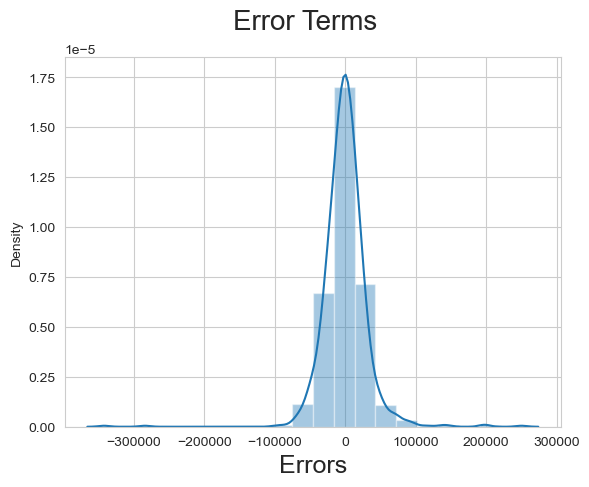

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [159]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.84

In [160]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1019743540238.3799
998769383.1913613
31603.312851524937


In [161]:
# Residual analysis
y_res = (y_train - y_train_cnst)

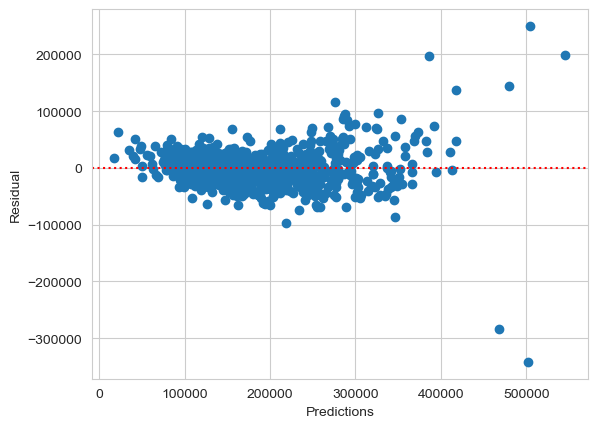

In [162]:
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [163]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [164]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [165]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [166]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior2nd_Brk Cmn', 'E

In [167]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [168]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [169]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     48.25
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.59e-140
Time:                        16:25:29   Log-Likelihood:                -5125.9
No. Observations:                 439   AIC:                         1.036e+04
Df Residuals:                     383   BIC:                         1.059e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.461e+05   2.62e+04      5.572      0.000    9.45e+04    1.98e+05
OverallQual           2.525e+04   2824.929      8.937      0.000    1.97e+04    3.08e+04
BsmtExposure          7287.3444   1923.502      3.789      0.000    3505.399    1.11e+04
BsmtUnfSF            -9362.4156   1941.700     -4.822      0.000   -1.32e+04   -5544.690
TotalBsmtSF           1.762e+04   4364.771      4.037      0.000    9037.274    2.62e+04
1stFlrSF              1.845e+04   3687.427      5.004      0.000    1.12e+04    2.57e+04
2ndFlrSF               3.08e+04   4015.021      7.671      0.000    2.29e+04    3.87e+04
GarageYrBlt           2721.9675   1749.304      1.556      0.121    -717.474    6161.409
MSSubClass_45         8770.1744   1.58e+04      0.554      0.580   -2.24e+04    3.99e+04
MSSubClass_75         -1.49e+04   2.38e+04     -0.627      0.531   -6.16e+04    3.18e+04
MSSubClass_90        -1.926e+04   1.08e+04     -1.777      0.076   -4.06e+04    2047.589
MSSubClass_120       -2.226e+04   7860.325     -2.831      0.005   -3.77e+04   -6800.502
MSSubClass_160       -2.993e+04   9813.534     -3.050      0.002   -4.92e+04   -1.06e+04
MSSubClass_180        3381.3046   1.79e+04      0.189      0.851   -3.19e+04    3.86e+04
MSSubClass_190       -1.088e+04   1.46e+04     -0.745      0.457   -3.96e+04    1.78e+04
MSZoning_FV           3.228e+04   2.62e+04      1.234      0.218   -1.91e+04    8.37e+04
MSZoning_RH          -1.511e+04   2.72e+04     -0.556      0.579   -6.86e+04    3.84e+04
MSZoning_RL           1.131e+04   2.05e+04      0.552      0.581    -2.9e+04    5.16e+04
MSZoning_RM           2288.9899   2.04e+04      0.112      0.911   -3.79e+04    4.24e+04
LotConfig_CulDSac     1.622e+04   6287.556      2.579      0.010    3855.326    2.86e+04
LotConfig_FR2          139.9033   8564.944      0.016      0.987   -1.67e+04     1.7e+04
Neighborhood_ClearCr  -146.3371   1.19e+04     -0.012      0.990   -2.36e+04    2.33e+04
Neighborhood_Crawfor  2.024e+04   8049.991      2.514      0.012    4412.556    3.61e+04
Neighborhood_Edwards -4526.7101   7322.339     -0.618      0.537   -1.89e+04    9870.306
Neighborhood_NPkVill  2.199e+04   3.19e+04      0.689      0.491   -4.08e+04    8.47e+04
Neighborhood_NoRidge  2.638e+04   1.43e+04      1.839      0.067   -1824.917    5.46e+04
Neighborhood_NridgHt  6.274e+04   8951.948      7.008      0.000    4.51e+04    8.03e+04
Neighborhood_Somerst -2288.8845    1.5e+04     -0.153      0.878   -3.17e+04    2.71e+04
Neighborhood_StoneBr  7.666e+04   1.07e+04      7.147      0.000    5.56e+04    9.78e+04
Neighborhood_Veenker  4.128e-11   7.68e-11      0.538      0.591    -1.1e-10    1.92e-10
HouseStyle_1.5Unf     8770.1744   1.58e+04      0.554      0.580   -2.24e+04    3.99e+04
HouseStyle_1Story     1.398e+04   6398.177      2.185    

In [170]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [171]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [172]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

512832940442.6621
1168184374.5846517
34178.71230144067


In [173]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [174]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,MSZoning_RL,58.27
56,MasVnrType_None,39.14
44,Exterior1st_VinylSd,37.08
53,Exterior2nd_VinylSd,35.34
50,Exterior2nd_MetalSd,33.60
...,...,...
19,LotConfig_FR2,1.11
36,RoofStyle_Shed,1.09
33,RoofStyle_Gambrel,1.08
60,Foundation_Wood,1.02


Text(0, 0.5, 'y_pred')

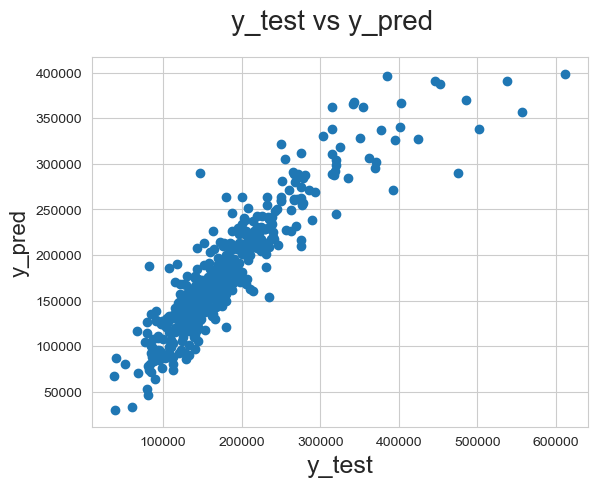

In [175]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [176]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior2nd_Brk Cmn', 'E

In [177]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

In [178]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8402120856645298
0.8185128011396163
1019743540238.3799
512832940442.6621
998769383.1913613
1168184374.5846517


### Ridge Regression

In [179]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [181]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 27404.60269081  11777.84582983  -5855.95838662   6843.39460817
  21355.87900349  29975.65411641   1423.85589956   3938.51476365
  -8721.88130512 -15835.7929275  -13164.63293543 -13962.83022782
  -2163.39708944 -12038.55349849   7730.05912691   -370.04411437
  11148.8493516   -2578.63082429  11401.51530184  -5694.91741311
   8918.09816847  17867.82933991 -14402.53796041   3021.43341888
  41893.40346939  43635.36695075  22141.34633222  14313.65107026
  13824.03014712   5209.63731272  20287.10973248  -3509.99423867
  -5001.03600732   2146.48640063   2832.82053638    150.14636009
    513.49256595  -3141.30711063  -3203.83401217  -1689.35472925
  -1359.97473255  -1188.9834342   -1705.3161225  -13991.8290476
   2213.33979093    231.86688951  11670.45201504  16567.48111003
   3671.75737181   8964.24567554   5060.65714834      0.
   1147.31939196  11543.70011495  -1514.97121027   5067.07488044
   4576.75154523   2830.93429654   2417.29034349   1783.13369713
   -485.5380075 ]


In [182]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8313595626507678
0.8209621394266321
1076239071803.6943
505911783668.209
1054102910.6794264
1152418641.6132324


## Lasso

In [183]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [184]:
# The best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [185]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [186]:
lasso.coef_

array([ 26110.16645729,  11987.41254372,  -5866.75317793,   5558.88261324,
        21841.47262911,  29822.61167236,   1344.75107805,      0.        ,
        -6632.78882358, -17329.03872907, -15639.52987381, -15919.98437081,
           -0.        , -12755.80039035,      0.        ,      0.        ,
        12409.76986694,     -0.        ,  10904.23771084,  -4672.57240574,
        10043.15166897,  22628.82401539, -14439.55668552,      0.        ,
        55836.54623873,  55523.04461561,  34972.8238872 ,  23362.69188138,
        19143.22626533,   4743.06418434,  21513.30800033,     -0.        ,
        -4188.90347403,      0.        ,   1534.38076578,      0.        ,
            0.        ,     -0.        ,     -0.        ,     -0.        ,
            0.        ,      0.        ,     -0.        , -15101.51384936,
            0.        ,      0.        ,  13469.95411428,  17123.53648937,
          444.01323897,   5164.81540869,   3236.73326887,      0.        ,
            0.        ,  

In [187]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8343915289232832
0.8218163130949889
1056889498129.8872
503498123659.4438
1035151320.4014566
1146920555.0329015


In [188]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.402121e-01,8.313596e-01,8.343915e-01
1,R2 Score (Test),8.185128e-01,8.209621e-01,8.218163e-01
2,RSS (Train),1.019744e+12,1.076239e+12,1.056889e+12
3,RSS (Test),5.128329e+11,5.059118e+11,5.034981e+11
4,MSE (Train),3.160331e+04,3.246695e+04,3.217377e+04
5,MSE (Test),3.417871e+04,3.394729e+04,3.386622e+04


## Lets observe the changes in the coefficients after regularization

In [189]:
betas = pd.DataFrame(index=X.columns)

In [190]:
betas.rows = X.columns

In [191]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [192]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,2.401487e+04,27404.602691,26110.166457
BsmtExposure,1.239922e+04,11777.845830,11987.412544
BsmtUnfSF,-5.988484e+03,-5855.958387,-5866.753178
TotalBsmtSF,5.360457e+03,6843.394608,5558.882613
1stFlrSF,2.111698e+04,21355.879003,21841.472629
2ndFlrSF,3.308824e+04,29975.654116,29822.611672
GarageYrBlt,9.967763e+02,1423.855900,1344.751078
MSSubClass_45,-6.957934e+03,3938.514764,0.000000
MSSubClass_75,-1.668989e+04,-8721.881305,-6632.788824
MSSubClass_90,-2.248931e+04,-15835.792927,-17329.038729


### Que1: Double the values of Alpha for lasso & Ridge

In [193]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 28496.85360459  11416.79545386  -5681.21885377   7764.80824626
  21226.32092583  28096.43042487   1590.81232889   2781.29724008
  -5569.7899184  -12690.32456238  -9494.67723347 -11124.8665318
   -519.74728264  -9114.70358963   6710.77462277  -1449.31521372
   8992.14490471  -5804.97592945  10457.25574743  -3953.45979331
   6368.40107986  13121.58244829 -13322.01977258    815.47504323
  33071.23136184  34276.69531734  16105.27441511   8336.02543806
   8780.17137438   3164.58753093  17236.39340194  -1819.54219548
  -3153.98342112   1410.4939541    3224.86105482   -120.65076311
    407.88946164  -1685.39503778  -2577.50145896   -495.04699972
   -689.6310124   -1753.29125829   -823.80011036 -11227.56148589
   3469.74629957   -458.41067119   7543.43686475  12456.44959209
   1263.34258309   5385.07254227   2905.92821616      0.
   -129.81026731   8689.56409715  -2467.78912875   2775.8907741
   2326.8830578    2158.68274526   2122.88337392    727.78829168
   -276.8907632 ]
0.824263493867274

___Coeff values are increasing as alpha will increase.r2_score of train data is also drop from .807 to 0.45___

In [194]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 27261.57155197  11812.0525628   -5606.38826189   5988.55256107
  21968.06259915  27945.85794806   1390.06892995      0.
     -0.         -14106.24388507 -10315.26972515 -12615.87222398
     -0.          -7893.48395961      0.              0.
  11861.4751832   -1233.43092744  10447.36671817     -0.
   3261.41616586  17194.57124781 -13635.71871708      0.
  52249.42941177  48890.32865     29484.45961642  10192.07380779
   7237.06630292      0.          19451.85386758     -0.
  -1643.52566499      0.           1088.2624615       0.
      0.             -0.             -0.             -0.
      0.              0.             -0.         -11037.38330891
      0.             -0.           6376.68392983  12851.92513255
     -0.              0.           1617.94844947      0.
      0.          11431.46011158   -352.95011287      0.
    484.46052165     -0.              0.              0.
      0.        ]
0.8286768275233464
0.8169699783412838


___As alpha value increased more feautrues removed from model. But r2score is also dropped by 1% in both test and train data___

### Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `2ndFlrSF`, `OverallQual`, `Neighborhood_Veenker`___

In [195]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [196]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [197]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [198]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [199]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [200]:
lasso.coef_

array([ 11701.78606334,  -1866.45038914,  13127.43641184,  36400.32050452,
         4101.70156026,     -0.        ,      0.        , -25913.20849135,
         3066.6381258 ,  -7404.68065544,     -0.        , -11403.93902594,
            0.        ,     -0.        ,   5943.48170092, -12041.68758137,
         5725.38707895,      0.        ,      0.        ,   6655.18328146,
       -24552.91402662,     -0.        ,  20303.46424074,   3932.06588122,
           -0.        , -17433.5873211 ,      0.        ,  46252.38384646,
           -0.        ,   6815.30776064,      0.        ,      0.        ,
           -0.        ,     -0.        ,      0.        ,      0.        ,
        -3425.4536749 ,     -0.        ,     -0.        ,   1077.87096748,
           -0.        ,      0.        ,  10173.36807461,     -0.        ,
            0.        ,    190.76737004,      0.        ,  -4114.12987369,
        23426.67182938,     -0.        ,      0.        ,  -5536.12682151,
         5879.17837402,  

In [201]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6766170081986822
0.6887271553750334


___After dropping the top 5 features model r2 score is very low i.e. 45% for Train and 44% for Test.___

In [202]:
X_train_new.columns

Index(['BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt',
       'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior

___Next top 5 features after drooping 5 main predictors `1stFlrSF` ,`MSSubClass_90`, `MSSubClass_120`, `TotalBsmtSF`, `HouseStyle_1Story`___ 